In [30]:
%matplotlib inline

In [32]:
import csv
import random

# PyPlot is an object-oriented plot interface to matplotlib
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import networkx as nx

In [34]:
g = nx.Graph()

In [37]:
file = 'social media influencers - instagram sep-2022.csv'
df = pd.read_csv(file)
df

In [ ]:
# Add nodes for Instagram influencers
for index, row in df.iterrows():
    g.add_node(row['Instagram name'])

# Add edges between influencers with the same content type
for index, row in df.iterrows():
    for index2, row2 in df.iterrows():
        if row['Category_1'] == row2['Category_1'] and row['Instagram name'] != row2['Instagram name']:
            g.add_edge(row['Instagram name'], row2['Instagram name'])

In [ ]:
nx.draw(g, with_labels=True)

plt.show()

In [ ]:
print("Nodes:", len(g.nodes))

In [ ]:
nx.write_graphml(g, "influencers.graphml")

In [169]:
content_type_counts = df['Category_1'].value_counts()

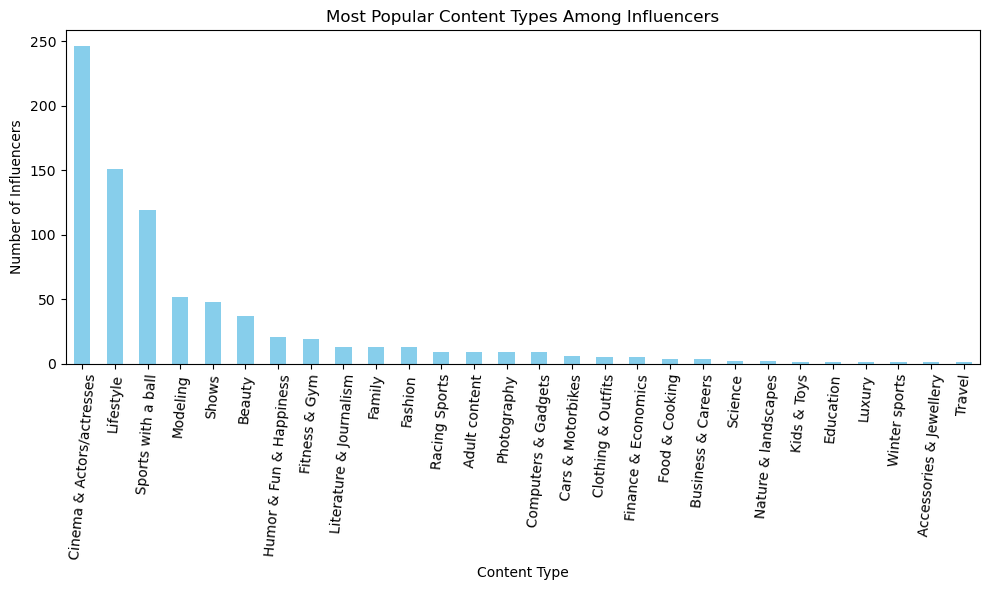

In [150]:
# Sort the content types based on the number of influencers
sorted_content_types = content_type_counts.sort_values(ascending=False)

# Plot the counts on a bar graph
plt.figure(figsize=(10, 6))
sorted_content_types.plot(kind='bar', color='skyblue')
plt.title('Most Popular Content Types Among Influencers')
plt.xlabel('Content Type')
plt.ylabel('Number of Influencers')
plt.xticks(rotation=85)

plt.tight_layout()
plt.show()

In [152]:
top_k = 3 # how many of the most central nodes to print

In [154]:
# Calculate degree centrality
centrality_degree = nx.degree_centrality(g)

# Sort node-centrality dictionary by metric, and reverse to get top elements first
for u in sorted(centrality_degree, key=centrality_degree.get, reverse=True)[:top_k]:
    # Check if the node has a 'name' attribute
    print(u, centrality_degree[u])

zendaya 0.24134419551934824
tomholland2013 0.24134419551934824
milliebobbybrown 0.24134419551934824


In [156]:
# Pagerank centrality
centrality_pagerank = nx.pagerank(g)
for u in sorted(centrality_pagerank, key=centrality_pagerank.get, reverse=True)[:top_k]:
    print(u, centrality_pagerank[u])

dhanashree9 0.0023448258409938375
selenagomez 0.0012999628560520081
agustd 0.0012999628560520081
